In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [23]:
def solve_sir_model(beta, r, N, initial_conditions, t_max, dt):
    S0, I0, R0 = initial_conditions
    t = np.arange(0, t_max, dt)
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    R = np.zeros_like(t)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    for i in range(1, len(t)):
        dS_dt = -beta * S[i-1] * I[i-1] / N
        dI_dt = beta * S[i-1] * I[i-1] / N - r * I[i-1]
        dR_dt = r * I[i-1]
        
        S[i] = S[i-1] + dt * dS_dt
        I[i] = I[i-1] + dt * dI_dt
        R[i] = R[i-1] + dt * dR_dt
    
    return t, S, I, R


In [24]:
def plot_sir_model(t, S, I, R):
    plt.plot(t, S, label='Susceptible')
    plt.plot(t, I, label='Infected')
    plt.plot(t, R, label='Recovered')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

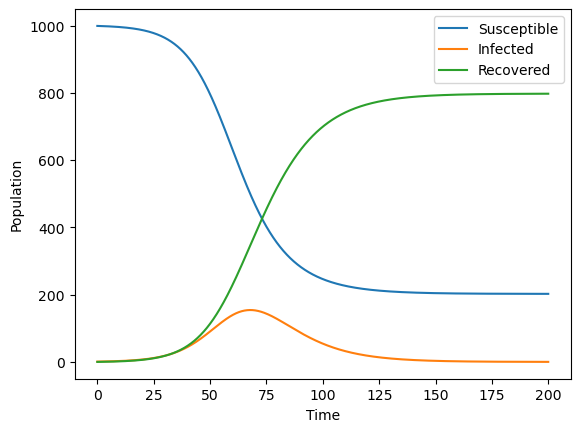

Epidemic occurred


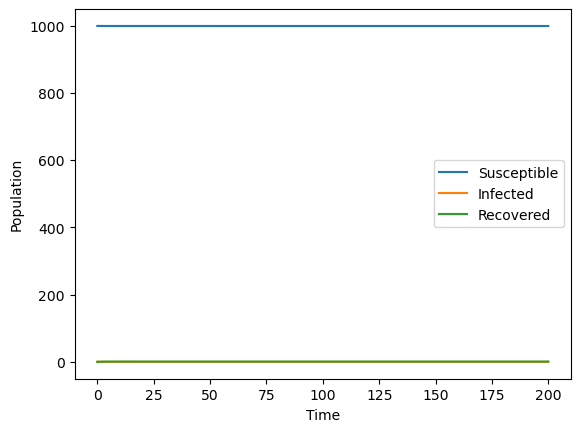

Epidemic occurred


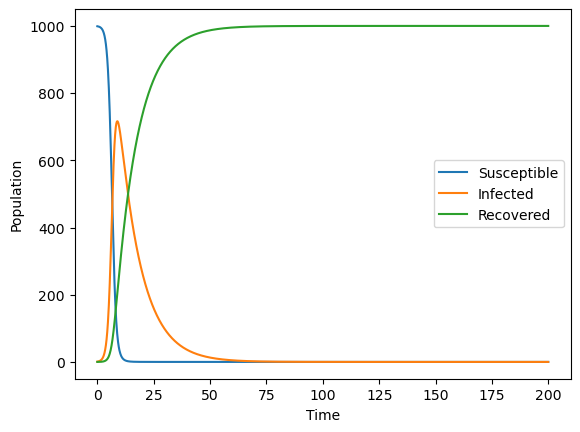

Epidemic occurred


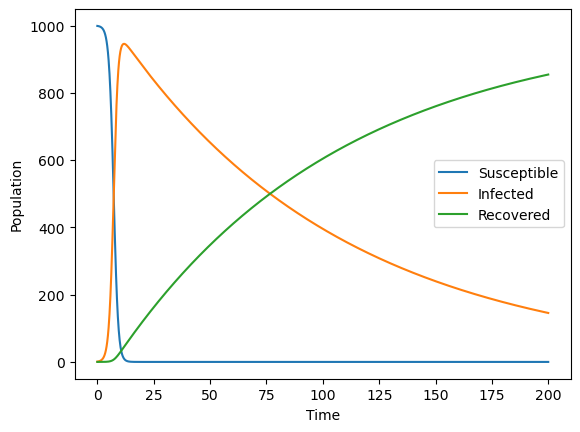

Epidemic occurred


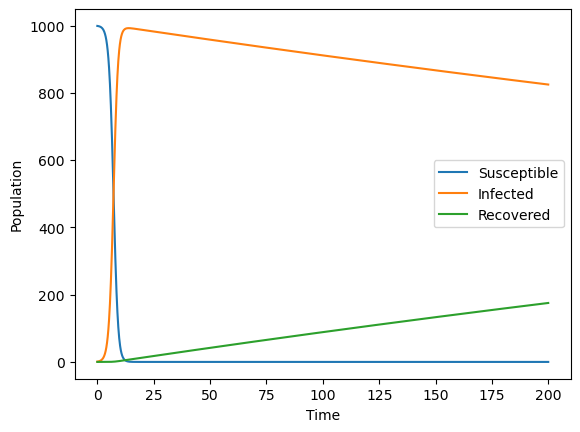

Epidemic occurred


In [38]:
# Parameters
N = 1000  # Population size
t_max = 200  # Maximum time
dt = 0.1  # Time step size

# Task 1: Check R0 formula and plot time evolution
parameter_combinations = [
    (0.2, 0.1),  # R0 < 1
    (0.1, 0.6),  # R0 < 1
    (1.2, 0.1),  # R0 > 1
    (1, 0.01), # R0 > 1
    (1, 0.001)  # R0 > 1
]

for beta, r in parameter_combinations:
    initial_conditions = (N - 1, 1, 0)  # (S0, I0, R0)
    t, S, I, R = solve_sir_model(beta, r, N, initial_conditions, t_max, dt)
    plot_sir_model(t, S, I, R)
    
    R0 = beta * N / r
    if R0 > 1:
        print("Epidemic occurred")
    else:
        print("No epidemic occurred")


In [39]:
def plot_phase_portrait(beta, r, N, S_range, I_range):
    S, I = np.meshgrid(S_range, I_range)
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - r * I
    
    plt.quiver(S, I, dS_dt, dI_dt)
    plt.xlabel('Susceptible')
    plt.ylabel('Infected')
    plt.title('Phase Portrait')
    plt.grid()
    plt.show()

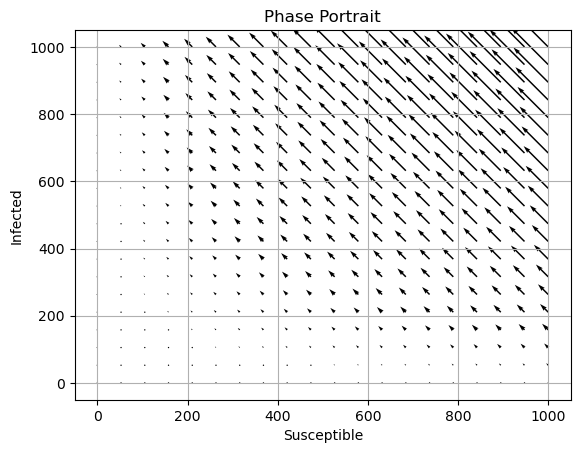

In [40]:
# Task 2: Plot phase portraits
beta = 0.8
r = 0.1
S_range = np.linspace(0, N, 20)
I_range = np.linspace(0, N, 20)
plot_phase_portrait(beta, r, N, S_range, I_range)

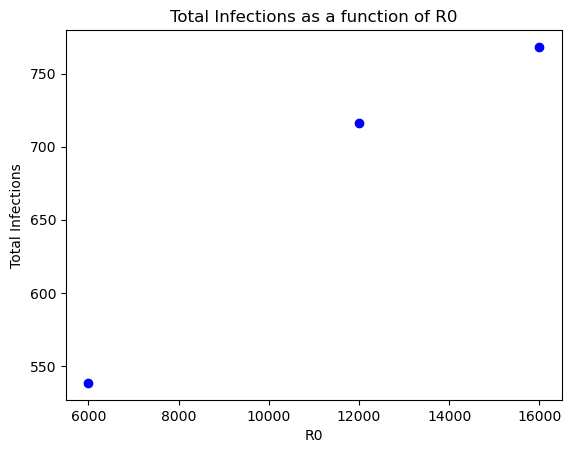

In [19]:
# Task 3: Total infections 
parameter_combinations = [
    (0.6, 0.1),
    (1.2, 0.1),
    (0.8, 0.05)
]

total_infections = []
R0_values = []

for beta, r in parameter_combinations:
    initial_conditions = (N - 1, 1, 0)  # (S0, I0, R0)
    t, S, I, R = solve_sir_model(beta, r, N, initial_conditions, t_max, dt)
    
    total_infected = np.max(I)  # Total number of infected individuals during the epidemic
    total_infections.append(total_infected)
    
    R0 = beta * N / r
    R0_values.append(R0)

plt.plot(R0_values, total_infections, 'bo')
plt.xlabel('R0')
plt.ylabel('Total Infections')
plt.title('Total Infections as a function of R0')
plt.show()